<a href="https://colab.research.google.com/github/AshraqtTamer/Ticket-Classification/blob/main/Binary_Ticket_Classification_(Auto_response).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/dataset-tickets-multi-lang-4-20k.csv')
data.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [ ]:

data = data[data['language'] != 'de']
data.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN
5,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature,IT,Tech Support,NaN,NaN,NaN
7,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug,Resolution,Outage,Documentation,NaN,NaN


In [ ]:
len(data)


11923

In [ ]:
data_selected = data[['body', 'type']]
data_selected.head()

,body,type
1,Seeking information on digital strategies that...,Request
2,I am contacting you to request information on ...,Request
4,"Dear Customer Support, I am reaching out to in...",Request
5,Inquiring about best practices for securing me...,Request
7,"The integration stopped working unexpectedly, ...",Problem


In [ ]:
data_selected.isnull().sum()

,0
body,1
type,0


In [ ]:


data_selected.dropna(inplace=True)
data_selected.isnull().sum()


<ipython-input-89-429e4fddb9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)


,0
body,0
type,0


In [ ]:
data_selected.duplicated().sum()

0

In [ ]:
data_selected.value_counts('type')

,count
type,
Incident,4642
Request,3498
Problem,2497
Change,1285


In [ ]:
data_selected = data_selected[data_selected['type'] != 'Change']
data_selected.value_counts('type')


,count
type,
Incident,4642
Request,3498
Problem,2497


In [ ]:
# prompt: remove incident rows

data_selected = data_selected[data_selected['type'] != 'Incident']
data_selected.value_counts('type')


,count
type,
Request,3498
Problem,2497


In [ ]:
data_selected.head()

,body,type
1,Seeking information on digital strategies that...,Request
2,I am contacting you to request information on ...,Request
4,"Dear Customer Support, I am reaching out to in...",Request
5,Inquiring about best practices for securing me...,Request
7,"The integration stopped working unexpectedly, ...",Problem


In [ ]:

print(len(data_selected[data_selected['body'] == '']))


0


# Text Preprocessing

In [ ]:
import re
import string
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [ ]:

data_selected['body'] = data_selected['body'].apply(clean_text)

In [ ]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
data_selected['body'] = data_selected['body'].apply(lambda x: lemmatizer(x))

In [ ]:

print(data_selected['body'])


1        information strategy aid brand growth detail s...
2        contact request information tool eclipse ide i...
4        customer support security protocol place datum...
5        practice datum laptop need guidance protect in...
7        integration stop work synchronization error pl...
                               ...                        
19985                                 information solution
19992    detail smarthomekamera application confidentia...
19993              information strategy brand growth thank
19995    integration problem disruption project issue c...
19997    customer support inquire billing option integr...
Name: body, Length: 5995, dtype: object


In [ ]:

def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)


In [ ]:
data_selected['body'] = data_selected['body'].apply(lambda x: extract_pos_tags(x))

In [ ]:
data_selected.head()

,body,type
1,information strategy aid brand growth detail s...,Request
2,contact request information tool eclipse ide i...,Request
4,customer support security protocol place datum...,Request
5,datum laptop guidance information tip recommen...,Request
7,integration stop work synchronization error pl...,Problem


## EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


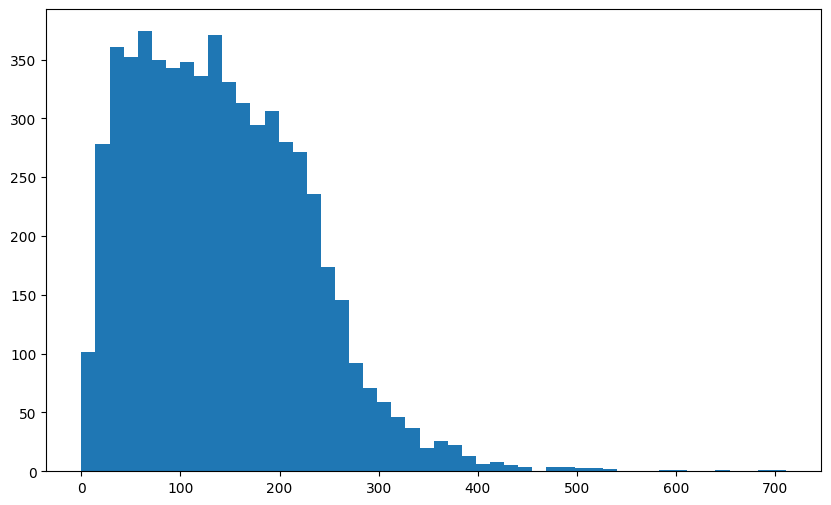

In [ ]:
plt.figure(figsize=(10,6))
doc_len=[len(d) for d in data_selected['body']]
plt.hist(doc_len, bins=50)
plt.show()

In [ ]:
!pip install wordcloud

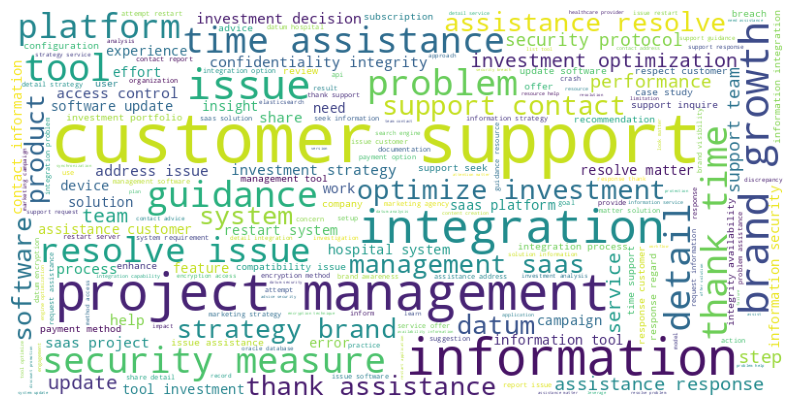

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_selected['body']))
print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:

def remove_pronouns(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ != 'PRP']
    return ' '.join(sent)

data_selected['body'] = data_selected['body'].apply(lambda x: remove_pronouns(x))
data_selected.head()


,body,type
1,information strategy aid brand growth detail s...,Request
2,contact request information tool eclipse ide i...,Request
4,customer support security protocol place datum...,Request
5,datum laptop guidance information tip recommen...,Request
7,integration stop work synchronization error pl...,Problem


# Feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')
dtm= tfidf.fit_transform(data_selected['body'])
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 81136 stored elements and shape (5995, 1313)>

In [ ]:
tfidf.get_feature_names_out()[:10]

array(['ability', 'abundance', 'access', 'accessibility', 'accessory',
       'accnum', 'accordance', 'account', 'accounting', 'accuracy'],
      dtype=object)

In [ ]:
Training_data=data_selected[['body','type']]
Training_data.head()

,body,type
1,information strategy aid brand growth detail s...,Request
2,contact request information tool eclipse ide i...,Request
4,customer support security protocol place datum...,Request
5,datum laptop guidance information tip recommen...,Request
7,integration stop work synchronization error pl...,Problem


<Axes: xlabel='type', ylabel='count'>

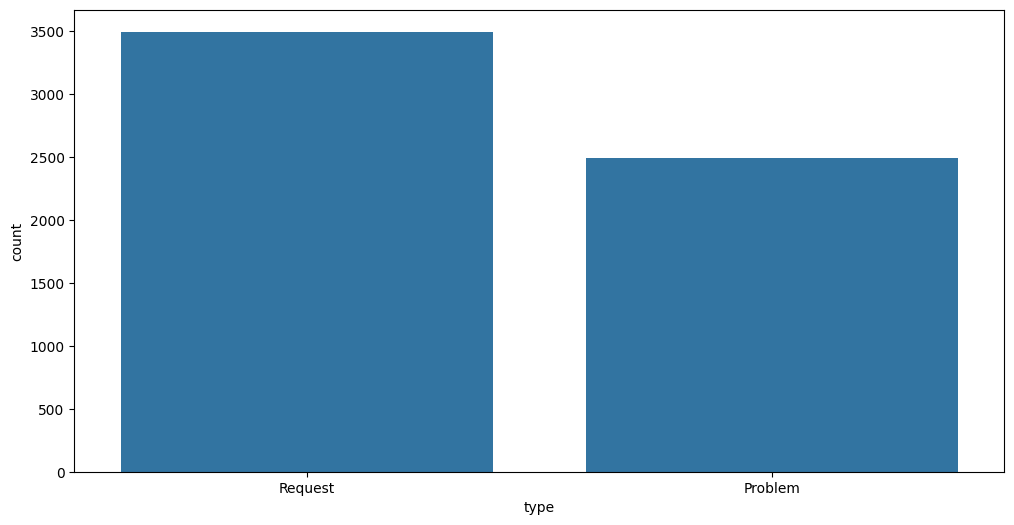

In [ ]:

plt.figure(figsize=(12,6))
sns.countplot(x='type',data=data_selected)

In [ ]:
from collections import Counter

from imblearn.over_sampling import SMOTE

X = dtm
y = data_selected['type']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Original dataset shape %s" % Counter(y))
print("Resampled dataset shape %s" % Counter(y_resampled))


Original dataset shape Counter({'Request': 3498, 'Problem': 2497})
Resampled dataset shape Counter({'Request': 3498, 'Problem': 3498})


In [ ]:
X_resampled.shape, y_resampled.shape

((6996, 1313), (6996,))

<Axes: xlabel='type', ylabel='count'>

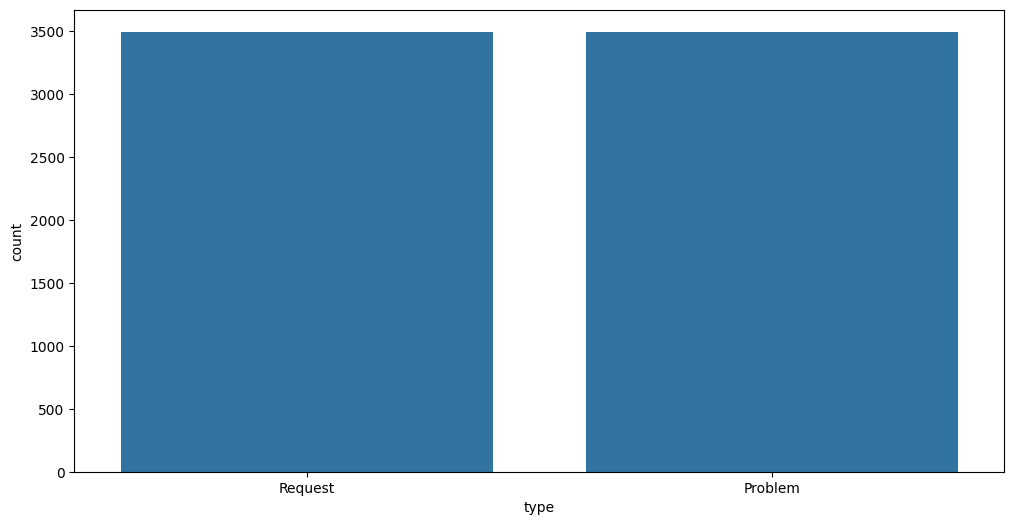

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_resampled)

# Model Training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x=X_resampled
y=y_resampled
count_vec=CountVectorizer()

X_text = [tfidf.inverse_transform(row)[0] for row in x]

X_text = [' '.join(doc) for doc in X_text]
X_vect = count_vec.fit_transform(X_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Classification model

In [ ]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

     Problem       0.98      0.98      0.98       704
     Request       0.98      0.98      0.98       696

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

Accuracy: 0.9807142857142858


In [ ]:

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Example with 5 folds

for train_index, test_index in skf.split(X_tfidf, y):
    X_train_fold, X_test_fold = X_tfidf[train_index], X_tfidf[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    clf = MultinomialNB()
    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)
    print(classification_report(y_test_fold, y_pred_fold))
    print(f"Accuracy: {accuracy_score(y_test_fold, y_pred_fold)}")


              precision    recall  f1-score   support

     Problem       0.96      0.98      0.97       700
     Request       0.98      0.96      0.97       700

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400

Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

     Problem       0.97      0.99      0.98       699
     Request       0.99      0.97      0.98       700

    accuracy                           0.98      1399
   macro avg       0.98      0.98      0.98      1399
weighted avg       0.98      0.98      0.98      1399

Accuracy: 0.9807005003573981
              precision    recall  f1-score   support

     Problem       0.98      0.98      0.98       699
     Request       0.98      0.98      0.98       700

    accuracy                           0.98      1399
   macro avg       0.98      0.98      0.98      1399
weighted avg    

In [ ]:
from sklearn.svm import SVC


x = X_resampled
y = y_resampled


svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

     Problem       0.97      0.99      0.98       704
     Request       0.99      0.97      0.98       696

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

Accuracy: 0.98


In [ ]:


from sklearn.model_selection import ParameterGrid

# Define the parameter grid for your custom grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Example parameters for MultinomialNB
    'fit_prior': [True, False]
}

best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")  # Print the current parameters

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []
    for train_index, test_index in skf.split(X_tfidf, y):
        X_train_fold, X_test_fold = X_tfidf[train_index], X_tfidf[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        clf = MultinomialNB(**params) # Use the current parameters
        clf.fit(X_train_fold, y_train_fold)

        y_pred_fold = clf.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        fold_scores.append(accuracy)
        print(f"Fold accuracy: {accuracy}")

    avg_accuracy = np.mean(fold_scores)
    print(f"Average accuracy for this parameter set: {avg_accuracy}")

    if avg_accuracy > best_score:
        best_score = avg_accuracy
        best_params = params

print(f"\nBest parameters: {best_params}")
print(f"Best average accuracy: {best_score}")


Training with parameters: {'alpha': 0.1, 'fit_prior': True}
Fold accuracy: 0.9692857142857143
Fold accuracy: 0.9807005003573981
Fold accuracy: 0.9821300929235168
Fold accuracy: 0.9842744817726948
Fold accuracy: 0.9814152966404575
Average accuracy for this parameter set: 0.9795612171959563
Training with parameters: {'alpha': 0.1, 'fit_prior': False}
Fold accuracy: 0.9692857142857143
Fold accuracy: 0.9807005003573981
Fold accuracy: 0.9821300929235168
Fold accuracy: 0.9835596854896355
Fold accuracy: 0.9749821300929236
Average accuracy for this parameter set: 0.9781316246298376
Training with parameters: {'alpha': 0.5, 'fit_prior': True}
Fold accuracy: 0.9707142857142858
Fold accuracy: 0.9807005003573981
Fold accuracy: 0.9792709077912795
Fold accuracy: 0.9842744817726948
Fold accuracy: 0.9814152966404575
Average accuracy for this parameter set: 0.9792750944552232
Training with parameters: {'alpha': 0.5, 'fit_prior': False}
Fold accuracy: 0.9707142857142858
Fold accuracy: 0.9807005003573981


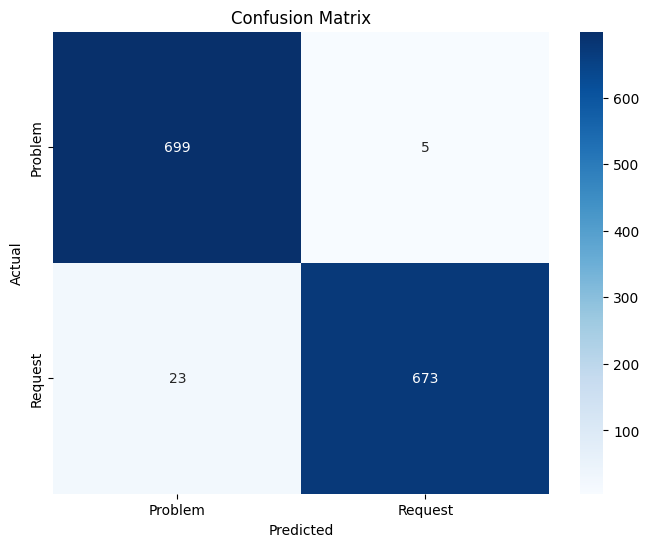

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your model's prediction
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:


print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

     Problem       0.98      0.98      0.98       704
     Request       0.98      0.98      0.98       696

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

Accuracy: 0.9792857142857143


# Test predictions

In [ ]:


def predict_text(text):
    # Preprocess the input text
    text = clean_text(text)
    text = lemmatizer(text)
    text = extract_pos_tags(text)
    text = remove_pronouns(text)

    # Transform the text using TF-IDF
    text_vec = count_vec.transform([text])
    text_tfidf = tfidf_transformer.transform(text_vec)

    # Predict the class using the trained classifier
    prediction = best_clf.predict(text_tfidf)[0]
    return prediction

# Example usage
sample_text = "I would like a refund for my recent purchase. It was defective. "
predicted_class = predict_text(sample_text)
print(f"Predicted class for the sample text: {predicted_class}")


Predicted class for the sample text: Request


In [ ]:
def auto_response(text):

    predicted_class = predict_text(text)

    if predicted_class == "Request":
        response = (
            "Dear Customer,\n\n"
            "Thank you for reaching out. Your request has been received and is being processed. "
            "We will update you as soon as possible.\n\n"
            "Best regards,\nSupport Team"
        )
    elif predicted_class == "Problem":
        response = (
            "Dear Customer,\n\n"
            "We apologize for the inconvenience. Our technical team is looking into the issue "
            "and will resolve it as soon as possible. Thank you for your patience.\n\n"
            "Best regards,\nSupport Team"
        )
    else:
        response = (
            "Dear Customer,\n\n"
            "We couldn't classify your message correctly. Could you please provide more details?\n\n"
            "Best regards,\nSupport Team"
        )

    # Print the auto-response
    print(f"\n🎯 Predicted Class: {predicted_class}")
    print("📩 Auto-Response:\n", response)
    return response

# Example Usage
sample_text = "I want to cancel my subscription.!"
auto_response(sample_text)



🎯 Predicted Class: Request
📩 Auto-Response:
 Dear Customer,

Thank you for reaching out. Your request has been received and is being processed. We will update you as soon as possible.

Best regards,
Support Team


'Dear Customer,\n\nThank you for reaching out. Your request has been received and is being processed. We will update you as soon as possible.\n\nBest regards,\nSupport Team'